In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import functions

In [2]:
file_path = '../data/raw/WorldCupMatches.csv'

wcm_df = pd.read_csv(file_path)

In [3]:
cleaned_df = wcm_df.dropna(thresh=3)

In [4]:
attendance_mean = wcm_df['Attendance'].mean()

In [5]:
cleaned_df['Attendance'] = cleaned_df['Attendance'].fillna(attendance_mean)

/tmp/ipykernel_133/1476385943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Attendance'] = cleaned_df['Attendance'].fillna(attendance_mean)


In [6]:
cleaned_df = functions.float_to_int(cleaned_df)

/Users/sergiopizzolante/Desktop/Ironhack/Week3/Project1/notebooks/functions.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/Users/sergiopizzolante/Desktop/Ironhack/Week3/Project1/notebooks/functions.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].astype(int)
/Users/sergiopizzolante/Desktop/Ironhack/Week3/Project1/notebooks/functions.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

In [7]:
cleaned_df = functions.update_columns_to_lower(cleaned_df)

In [8]:
# Filter matches involving Spain
spain_matches = cleaned_df[(cleaned_df['home team name'] == 'Spain') | (cleaned_df['away team name'] == 'Spain')]

In [9]:
sns.set(style="whitegrid")

In [10]:
folder_path = "../data/cleaned/"
spain_matches.to_csv(folder_path + 'spain_matches.csv')

In [11]:
# Initialize variables to track streaks
current_winning_streak = 0
max_winning_streak = 0
current_losing_streak = 0
max_losing_streak = 0

# Iterate through the DataFrame
for index, match in spain_matches.iterrows():
    if match['home team name'] == 'Spain' or match['away team name'] == 'Spain':
        # Check if Spain won the match
        if (match['home team name'] == 'Spain' and match['home team goals'] > match['away team goals']) or (match['away team name'] == 'Spain' and match['away team goals'] > match['home team goals']):
            current_winning_streak += 1
            # Update max winning streak if current streak is greater
            if current_winning_streak > max_winning_streak:
                max_winning_streak = current_winning_streak
            # Reset losing streak
            current_losing_streak = 0
        # Check if Spain lost the match
        else:
            current_losing_streak += 1
            # Update max losing streak if current streak is greater
            if current_losing_streak > max_losing_streak:
                max_losing_streak = current_losing_streak
            # Reset winning streak
            current_winning_streak = 0

print("Spain's best winning streak:", max_winning_streak)
print("Spain's worst losing streak:", max_losing_streak)


Spain's best winning streak: 6
Spain's worst losing streak: 4


In [12]:
spain_matches = spain_matches.drop(columns=['referee', 'assistant 1', 'assistant 2', 'roundid', 'matchid'])

In [13]:
spain_matches.reset_index(drop=True, inplace=True)

In [14]:
# Rows for missing data

spain_matches_2018_1 = {
    'year' : 2018,
    'datetime' : '15 Jun 2018 - ',
    'stage' : 'Group B',
    'stadium' : 'Fisht Stadium',
    'city' : 'Sochi',
    'home team name' : 'Portugal',
    'home team goals' : 3,
    'away team goals' : 3,
    'away team name' : 'Spain',
    #'win conditions' : ,
    'attendance' : 43866,
    'half-time home goals' : 2,
    'half-time away goals' : 1,
    'home team initials' : 'POR',
    'away team initials' : 'ESP'
}

spain_matches_2018_2 = {
    'year' : 2018,
    'datetime' : '20 Jun 2018 - ',
    'stage' : 'Group B',
    'stadium' : 'Kazan Arena',
    'city' : 'Kazan',
    'home team name' : 'Iran',
    'home team goals' : 0,
    'away team goals' : 1,
    'away team name' : 'Spain',
    #'win conditions' : ,
    'attendance' : 42718,
    'half-time home goals' : 0,
    'half-time away goals' : 0,
    'home team initials' : 'IRN',
    'away team initials' : 'ESP'
}

spain_matches_2018_3 = {
    'year' : 2018,
    'datetime' : '25 Jun 2018 - ',
    'stage' : 'Group B',
    'stadium' : 'Kaliningrad Stadium',
    'city' : 'Kaliningrad',
    'home team name' : 'Spain',
    'home team goals' : 2,
    'away team goals' : 2,
    'away team name' : 'Morocco',
    #'win conditions' : ,
    'attendance' : 33973,
    'half-time home goals' : 1,
    'half-time away goals' : 1,
    'home team initials' : 'ESP',
    'away team initials' : 'MOR'
}

spain_matches_2018_4 = {
    'year' : 2018,
    'datetime' : '1 Jul 2018 - ',
    'stage' : 'Round of 16',
    'stadium' : 'Luzhniki Stadium',
    'city' : 'Moscow',
    'home team name' : 'Spain',
    'home team goals' : 1,
    'away team goals' : 1,
    'away team name' : 'Russia',
    'win conditions' : 'Russia win in penalties',
    'attendance' : 78011,
    'half-time home goals' : 1,
    'half-time away goals' : 1,
    'home team initials' : 'ESP',
    'away team initials' : 'RUS'
}

spain_matches_2022_1 = {
    'year' : 2022,
    'datetime' : '23 Nov 2022 - ',
    'stage' : 'Group E',
    'stadium' : 'Al Thumama Stadium',
    'city' : 'Doha',
    'home team name' : 'Spain',
    'home team goals' : 7,
    'away team goals' : 0,
    'away team name' : 'Costa Rica',
    #'win conditions' : ,
    'attendance' : 40013,
    'half-time home goals' : 3,
    'half-time away goals' : 0,
    'home team initials' : 'ESP',
    'away team initials' : 'CRC'
}

spain_matches_2022_2 = {
    'year' : 2022,
    'datetime' : '27 Nov 2022 - ',
    'stage' : 'Group E',
    'stadium' : 'Al Bayt Stadium',
    'city' : 'Al Khor',
    'home team name' : 'Spain',
    'home team goals' : 1,
    'away team goals' : 1,
    'away team name' : 'Germany',
    #'win conditions' : ,
    'attendance' : 68895,
    'half-time home goals' : 0,
    'half-time away goals' : 0,
    'home team initials' : 'ESP',
    'away team initials' : 'GER'
}

spain_matches_2022_3 = {
    'year' : 2022,
    'datetime' : '1 Dec 2022 - ',
    'stage' : 'Group E',
    'stadium' : 'Khalifa International Stadium',
    'city' : 'Al Rayyan',
    'home team name' : 'Japan',
    'home team goals' : 2,
    'away team goals' : 1,
    'away team name' : 'Spain',
    #'win conditions' : ,
    'attendance' : 44851,
    'half-time home goals' : 0,
    'half-time away goals' : 1,
    'home team initials' : 'JAP',
    'away team initials' : 'ESP'
}


spain_matches_2022_4 = {
    'year' : 2022,
    'datetime' : '6 Dec 2022 - ',
    'stage' : 'Round of 16',
    'stadium' : 'Education City Stadium',
    'city' : 'Al Rayyan',
    'home team name' : 'Morocco',
    'home team goals' : 0,
    'away team goals' : 0,
    'away team name' : 'Spain',
    'win conditions' : 'Morocco win after penalties',
    'attendance' : 44667,
    'half-time home goals' : 0,
    'half-time away goals' : 0,
    'home team initials' : 'MOR',
    'away team initials' : 'ESP',
}


In [15]:
df2018_1 = pd.DataFrame(spain_matches_2018_1, index=[59])

In [16]:
df2018_2 = pd.DataFrame(spain_matches_2018_2, index=[60])

In [17]:
df2018_3 = pd.DataFrame(spain_matches_2018_3, index=[61])

In [18]:
df2018_4 = pd.DataFrame(spain_matches_2018_4, index=[62])

In [19]:
df2022_1 = pd.DataFrame(spain_matches_2022_1, index=[63])

In [20]:
df2022_2 = pd.DataFrame(spain_matches_2022_2, index=[64])

In [21]:
df2022_3 = pd.DataFrame(spain_matches_2022_3, index=[65])

In [22]:
df2022_4 = pd.DataFrame(spain_matches_2022_4, index=[66])

In [23]:
spain_matches = pd.concat([spain_matches, df2018_1], ignore_index=True, verify_integrity=True)

In [24]:
spain_matches = pd.concat([spain_matches, df2018_2], ignore_index=True, verify_integrity=True)

In [25]:
spain_matches = pd.concat([spain_matches, df2018_3], ignore_index=True, verify_integrity=True)

In [26]:
spain_matches = pd.concat([spain_matches, df2018_4], ignore_index=True, verify_integrity=True)

In [27]:
spain_matches = pd.concat([spain_matches, df2022_1], ignore_index=True, verify_integrity=True)

In [28]:
spain_matches = pd.concat([spain_matches, df2022_2], ignore_index=True, verify_integrity=True)

In [29]:
spain_matches = pd.concat([spain_matches, df2022_3], ignore_index=True, verify_integrity=True)

In [30]:
spain_matches = pd.concat([spain_matches, df2022_4], ignore_index=True, verify_integrity=True)

In [31]:
spain_matches.shape

(67, 15)

In [32]:
win_conditions_mode = spain_matches['win conditions'].mode()[0]

In [33]:
spain_matches['win conditions'] = spain_matches['win conditions'].fillna(win_conditions_mode)

In [34]:
# For matches where Spain was the home team
spain_home_matches = spain_matches[spain_matches['home team name'] == 'Spain']
spain_home_goals_scored = spain_home_matches['home team goals'].sum()
spain_home_goals_conceded = spain_home_matches['away team goals'].sum()

# For matches where Spain was the away team
spain_away_matches = spain_matches[spain_matches['away team name'] == 'Spain']
spain_away_goals_scored = spain_away_matches['away team goals'].sum()
spain_away_goals_conceded = spain_away_matches['home team goals'].sum()

In [35]:
# Calculate total goals scored and conceded by Spain
total_goals_scored = spain_home_goals_scored + spain_away_goals_scored
total_goals_conceded = spain_home_goals_conceded + spain_away_goals_conceded

# Calculate Spain's goal differential
spain_goal_differential = total_goals_scored - total_goals_conceded

In [36]:
# Create a dataframe to store Spain's goal information
spain_goals_info = pd.DataFrame({
    'Team': ['Spain'],
    'Total Goals Scored': [total_goals_scored],
    'Total Goals Conceded': [total_goals_conceded],
    'Goal Differential': [spain_goal_differential]
})

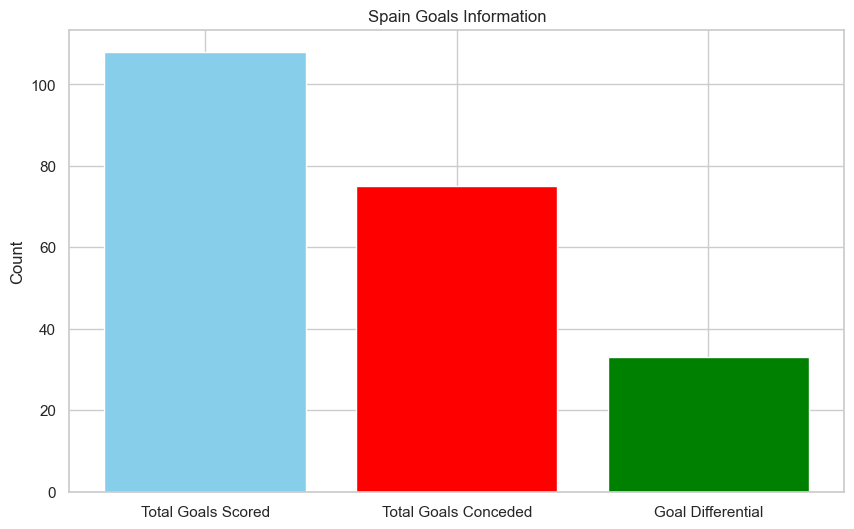

In [37]:
plt.figure(figsize=(10, 6))
bars = plt.bar(['Total Goals Scored', 'Total Goals Conceded', 'Goal Differential'], [total_goals_scored, total_goals_conceded, spain_goal_differential], color=['skyblue', 'red', 'green'])
plt.ylabel('Count')
plt.title('Spain Goals Information')
plt.show()

In [38]:
spain_goals_info.head()

,Team,Total Goals Scored,Total Goals Conceded,Goal Differential
0,Spain,108,75,33


In [39]:
# Filter matches where is spain is Home or is Away
spain_home_matches = cleaned_df[cleaned_df['home team name'] == 'Spain']
spain_away_matches = cleaned_df[cleaned_df['away team name'] == 'Spain']

# Calculate average goals scored and conceded when Spain is Home
avg_goals_scored_home = spain_home_matches['home team goals'].mean()
avg_goals_conceded_home = spain_home_matches['away team goals'].mean()

# Calculate average goals scored and conceded when Spain is Away
avg_goals_scored_away = spain_away_matches['away team goals'].mean()
avg_goals_conceded_away = spain_away_matches['home team goals'].mean()

# Calculate overall average goals scored and conceded
avg_goals_scored = (avg_goals_scored_home + avg_goals_scored_away) / 2
avg_goals_conceded = (avg_goals_conceded_home + avg_goals_conceded_away) / 2

print("Average goals scored by Spain per match:", avg_goals_scored)
print("Average goals conceded by Spain per match:", avg_goals_conceded)

Average goals scored by Spain per match: 1.5574712643678161
Average goals conceded by Spain per match: 1.1206896551724137


In [40]:
# Opponents Spain has beaten the most
most_wins = spain_matches[spain_matches['home team name'] == 'Spain']['away team name'].value_counts()

# Opponents Spain has lost to the most
most_losses = spain_matches[spain_matches['away team name'] == 'Spain']['home team name'].value_counts()

In [41]:
# Calculate Win-Loss Record
spain_home_wins = len(spain_matches[(spain_matches['home team name'] == 'Spain') & (spain_matches['home team goals'] > spain_matches['away team goals'])])
spain_away_wins = len(spain_matches[(spain_matches['away team name'] == 'Spain') & (spain_matches['away team goals'] > spain_matches['home team goals'])])
spain_wins = spain_home_wins + spain_away_wins

spain_home_losses = len(spain_matches[(spain_matches['home team name'] == 'Spain') & (spain_matches['home team goals'] < spain_matches['away team goals'])])
spain_away_losses = len(spain_matches[(spain_matches['away team name'] == 'Spain') & (spain_matches['away team goals'] < spain_matches['home team goals'])])
spain_losses = spain_home_losses + spain_away_losses

print("Spain's win-loss record:")
print("Wins:", spain_wins)
print("Losses:", spain_losses)

Spain's win-loss record:
Wins: 31
Losses: 19


In [44]:
# Initialize variables to track streaks
current_winning_streak = 0
max_winning_streak = 0
current_losing_streak = 0
max_losing_streak = 0

# Iterate through the Dataframe
for index, match in spain_matches.iterrows():
    if match['home team name'] == 'Spain' or match['away team name'] == 'Spain':
        # Check if Spain won the match
        if (match['home team name'] == 'Spain' and match['home team goals'] > match['away team goals']) or (match['away team name'] == 'Spain' and match['away team goals'] > match['home team goals']):
            current_winning_streak += 1
            # Update max winning streak if current streak is greater
            if current_winning_streak > max_winning_streak:
                max_winning_streak = current_winning_streak
            # Reset losing streak
            current_losing_streak = 0
        # Check if Spain lost the match
        else:
            current_losing_streak += 1
            # Update max losing streak if current streak is greater
            if current_losing_streak > max_losing_streak:
                max_losing_streak = current_losing_streak
            # Reset winning streak
            current_winning_streak = 0

print("Spain's best winning streak:", max_winning_streak)
print("Spain's worst losing streak:", max_losing_streak)

Spain's best winning streak: 6
Spain's worst losing streak: 4


In [45]:
spain_copy = spain_matches.copy()

In [46]:
spain_copy['stage reached'] = ''

In [47]:
stage_mapping = {
    'Group B' : "Group Stage",
    'Group 2' : "Group Stage",
    'Group 3' : "Group Stage",
    'Group D' : "Group Stage",
    'Group E' : "Group Stage",
    'Group H' : "Group Stage",
    'Group 6' : "Group Stage",
    'Group 5' : "Group Stage",
    'Group C' : "Group Stage",
    'Round of 16' : "Round of 16",
    'Quarter-finals' : "Quarter-finals",
    'Preliminary round' : "Preliminary round",
    'Semi-finals' : "Semi-finals",
    'Final' : "Final"
}

In [48]:
spain_copy['stage reached'] = spain_copy['stage'].map(stage_mapping)

In [49]:
spain_copy[['year', 'stage reached']].value_counts()

year  stage reached    
1950  Group Stage          6
1982  Group Stage          5
1998  Group Stage          3
2018  Group Stage          3
2006  Group Stage          3
2002  Group Stage          3
2014  Group Stage          3
1994  Group Stage          3
1990  Group Stage          3
2022  Group Stage          3
1986  Group Stage          3
1978  Group Stage          3
1966  Group Stage          3
1962  Group Stage          3
2010  Group Stage          3
1934  Quarter-finals       2
2018  Round of 16          1
2010  Final                1
      Semi-finals          1
      Round of 16          1
      Quarter-finals       1
1934  Preliminary round    1
2006  Round of 16          1
2002  Round of 16          1
      Quarter-finals       1
1994  Round of 16          1
      Quarter-finals       1
1990  Round of 16          1
1986  Round of 16          1
      Quarter-finals       1
2022  Round of 16          1
Name: count, dtype: int64

In [50]:
grouped_year_stage = spain_copy.groupby('stage reached').agg({'year': 'count'})

In [51]:
display(grouped_year_stage)

,year
stage reached,
Final,1
Group Stage,50
Preliminary round,1
Quarter-finals,6
Round of 16,8
Semi-finals,1


In [52]:
spain_copy['furthest stage'] = ''

In [53]:
last_stage_per_year = spain_copy.groupby('year')['stage reached'].last()

In [54]:
spain_copy['furthest stage'] = spain_copy['year'].map(last_stage_per_year)

In [55]:
spain_copy['furthest stage'].value_counts()

furthest stage
Group Stage       26
Quarter-finals    18
Round of 16       16
Final              7
Name: count, dtype: int64

In [56]:
spain_copy['spain role'] = spain_copy.apply(lambda row: 'home' if row['home team name'] == 'Spain' else 'away', axis=1)

In [57]:
folder_path = "../data/cleaned/"
spain_matches.to_csv(folder_path + 'spain_matches_new.csv')

In [63]:
# Group by year and Spain's role in the match, then calculate the average goals scored and conceded
avg_goals_by_year = spain_copy.groupby(['year', 'spain role']).agg({
    'home team goals': 'mean', 'away team goals': 'mean'}).unstack()

print(round(avg_goals_by_year,2))

           home team goals       away team goals      
spain role            away  home            away  home
year                                                  
1934                  1.00  3.00            0.50  1.00
1950                  3.67  2.00            1.33  0.33
1962                  1.50  1.00            0.50  0.00
1966                  2.00  2.00            1.00  1.00
1978                  1.00  1.00            0.50  0.00
1982                  1.50  1.00            0.50  0.67
1986                  0.67  0.50            3.33  1.00
1990                  0.67  1.00            1.67  2.00
1994                  1.33  2.50            1.67  1.00
1998                   NaN  2.67             NaN  1.33
2002                  2.00  1.75            3.00  0.75
2006                  0.00  2.67            1.00  1.33
2010                  0.25  1.00            1.25  0.33
2014                  0.00  0.50            3.00  3.50
2018                  1.50  1.50            2.00  1.50
2022      

In [65]:
new_wc_editions = [2022, 2018, 2014, 2010, 2006, 2002, 1998]
old_wc_editions = [1994, 1990, 1986, 1982, 1978, 1966, 1962]

In [66]:
for year in new_wc_editions:
    spain_home_matches_test = spain_copy[spain_copy['home team name'] == 'Spain']
    spain_away_matches_test = spain_copy[spain_copy['away team name'] == 'Spain']
    
    
    spain_home_matches_testing = spain_home_matches_test[spain_home_matches_test['year'] == year]
    spain_away_matches_testing = spain_away_matches_test[spain_away_matches_test['year'] == year]
    
    avg_goals_scored_home_testing = spain_home_matches_testing['home team goals'].mean()
    avg_goals_conceded_home_testing = spain_home_matches_testing['away team goals'].mean()
    
    avg_goals_scored_away_testing = spain_away_matches_testing['away team goals'].mean()
    avg_goals_conceded_away_testing = spain_away_matches_testing['home team goals'].mean()
    
    avg_goals_scored_test = (avg_goals_scored_home_testing + avg_goals_scored_away_testing) / 2
    avg_goals_conceded_test = (avg_goals_conceded_home_testing + avg_goals_conceded_away_testing) / 2
    
    #calculate goal differential
    goal_difference = (spain_home_matches_testing['home team goals'].sum() + spain_away_matches_testing['away team goals'].sum()).astype(int) - (spain_home_matches_testing['away team goals'].sum() + spain_away_matches_testing['home team goals'].sum()).astype(int)
    #print(goal_difference)
    
    print(f"Average goals scored by Spain per match in {year}:", round(avg_goals_scored_test,3))
    print(f"Average goals conceded by Spain per match in {year}:", round(avg_goals_conceded_test,3))
    print(f"Goal difference for wc {year} is: ", goal_difference)

Average goals scored by Spain per match in 2022: 2.25
Average goals conceded by Spain per match in 2022: 0.75
Goal difference for wc 2022 is:  6
Average goals scored by Spain per match in 2018: 1.75
Average goals conceded by Spain per match in 2018: 1.5
Goal difference for wc 2018 is:  1
Average goals scored by Spain per match in 2014: 1.75
Average goals conceded by Spain per match in 2014: 1.75
Goal difference for wc 2014 is:  -3
Average goals scored by Spain per match in 2010: 1.125
Average goals conceded by Spain per match in 2010: 0.292
Goal difference for wc 2010 is:  6
Average goals scored by Spain per match in 2006: 1.833
Average goals conceded by Spain per match in 2006: 0.667
Goal difference for wc 2006 is:  5
Average goals scored by Spain per match in 2002: 2.375
Average goals conceded by Spain per match in 2002: 1.375
Goal difference for wc 2002 is:  5
Average goals scored by Spain per match in 1998: nan
Average goals conceded by Spain per match in 1998: nan
Goal difference 

In [67]:
for year in old_wc_editions:
    spain_home_matches_test = spain_copy[spain_copy['home team name'] == 'Spain']
    spain_away_matches_test = spain_copy[spain_copy['away team name'] == 'Spain']
    
    
    spain_home_matches_testing = spain_home_matches_test[spain_home_matches_test['year'] == year]
    spain_away_matches_testing = spain_away_matches_test[spain_away_matches_test['year'] == year]
    
    avg_goals_scored_home_testing = spain_home_matches_testing['home team goals'].mean()
    avg_goals_conceded_home_testing = spain_home_matches_testing['away team goals'].mean()
    
    avg_goals_scored_away_testing = spain_away_matches_testing['away team goals'].mean()
    avg_goals_conceded_away_testing = spain_away_matches_testing['home team goals'].mean()
    
    avg_goals_scored_test = (avg_goals_scored_home_testing + avg_goals_scored_away_testing) / 2
    avg_goals_conceded_test = (avg_goals_conceded_home_testing + avg_goals_conceded_away_testing) / 2
    
    #calculate goal differential
    goal_difference = (spain_home_matches_testing['home team goals'].sum() + spain_away_matches_testing['away team goals'].sum()) - (spain_home_matches_testing['away team goals'].sum() + spain_away_matches_testing['home team goals'].sum())
    #print(goal_difference)
    
    print(f"Average goals scored by Spain per match in {year}:", round(avg_goals_scored_test,3))
    print(f"Average goals conceded by Spain per match in {year}:", round(avg_goals_conceded_test,3))
    print(f"Goal difference for wc {year} is: ", goal_difference)

Average goals scored by Spain per match in 1994: 2.083
Average goals conceded by Spain per match in 1994: 1.167
Goal difference for wc 1994 is:  4
Average goals scored by Spain per match in 1990: 1.333
Average goals conceded by Spain per match in 1990: 1.333
Goal difference for wc 1990 is:  2
Average goals scored by Spain per match in 1986: 1.917
Average goals conceded by Spain per match in 1986: 0.833
Goal difference for wc 1986 is:  7
Average goals scored by Spain per match in 1982: 0.75
Average goals conceded by Spain per match in 1982: 1.083
Goal difference for wc 1982 is:  -1
Average goals scored by Spain per match in 1978: 0.75
Average goals conceded by Spain per match in 1978: 0.5
Goal difference for wc 1978 is:  0
Average goals scored by Spain per match in 1966: 1.5
Average goals conceded by Spain per match in 1966: 1.5
Goal difference for wc 1966 is:  -1
Average goals scored by Spain per match in 1962: 0.75
Average goals conceded by Spain per match in 1962: 0.75
Goal differenc

In [68]:
grouped_year = spain_copy.groupby('year')

In [69]:
for wc, group in grouped_year:
    print(f"GROUP NAME: {wc}")
    display(group)

GROUP NAME: 1934


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
0,1934,27 May 1934 - 16:30,Preliminary round,Luigi Ferraris,Genoa,Spain,3,1,Brazil,,21000,3,0,ESP,BRA,Preliminary round,Quarter-finals,home
1,1934,31 May 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1,1,Spain,,35000,0,0,ITA,ESP,Quarter-finals,Quarter-finals,away
2,1934,01 Jun 1934 - 16:30,Quarter-finals,Giovanni Berta,Florence,Italy,1,0,Spain,,43000,1,0,ITA,ESP,Quarter-finals,Quarter-finals,away


GROUP NAME: 1950


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
3,1950,25 Jun 1950 - 15:00,Group 2,Durival de Brito,Curitiba,Spain,3,1,USA,,9511,0,1,ESP,USA,Group Stage,Group Stage,home
4,1950,29 Jun 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,2,0,Chile,,19790,2,0,ESP,CHI,Group Stage,Group Stage,home
5,1950,02 Jul 1950 - 15:00,Group 2,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Spain,1,0,England,,74462,0,0,ESP,ENG,Group Stage,Group Stage,home
6,1950,09 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Uruguay,2,2,Spain,,44802,1,2,URU,ESP,Group Stage,Group Stage,away
7,1950,13 Jul 1950 - 15:00,Group 6,Maracan� - Est�dio Jornalista M�rio Filho,Rio De Janeiro,Brazil,6,1,Spain,,152772,3,0,BRA,ESP,Group Stage,Group Stage,away
8,1950,16 Jul 1950 - 15:00,Group 6,Pacaembu,Sao Paulo,Sweden,3,1,Spain,,11227,2,0,SWE,ESP,Group Stage,Group Stage,away


GROUP NAME: 1962


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
9,1962,31 May 1962 - 15:00,Group 3,Estadio Sausalito,Vina Del Mar,Czechoslovakia,1,0,Spain,,12700,0,0,TCH,ESP,Group Stage,Group Stage,away
10,1962,03 Jun 1962 - 15:00,Group 3,Estadio Sausalito,Vina Del Mar,Spain,1,0,Mexico,,11875,0,0,ESP,MEX,Group Stage,Group Stage,home
11,1962,06 Jun 1962 - 15:00,Group 3,Estadio Sausalito,Vina Del Mar,Brazil,2,1,Spain,,18715,0,1,BRA,ESP,Group Stage,Group Stage,away


GROUP NAME: 1966


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
12,1966,13 Jul 1966 - 19:30,Group 2,Villa Park,Birmingham,Argentina,2,1,Spain,,42738,0,0,ARG,ESP,Group Stage,Group Stage,away
13,1966,15 Jul 1966 - 19:30,Group 2,Hillsborough,Sheffield,Spain,2,1,Switzerland,,32028,0,1,ESP,SUI,Group Stage,Group Stage,home
14,1966,20 Jul 1966 - 19:30,Group 2,Villa Park,Birmingham,Germany FR,2,1,Spain,,42187,1,1,FRG,ESP,Group Stage,Group Stage,away


GROUP NAME: 1978


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
15,1978,03 Jun 1978 - 13:45,Group 3,Jose Amalfitani,Buenos Aires,Austria,2,1,Spain,,40841,1,1,AUT,ESP,Group Stage,Group Stage,away
16,1978,07 Jun 1978 - 13:45,Group 3,Estadio Jos� Mar�a Minella,Mar Del Plata,Brazil,0,0,Spain,,34771,0,0,BRA,ESP,Group Stage,Group Stage,away
17,1978,11 Jun 1978 - 13:45,Group 3,Jose Amalfitani,Buenos Aires,Spain,1,0,Sweden,,42132,0,0,ESP,SWE,Group Stage,Group Stage,home


GROUP NAME: 1982


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
18,1982,16 Jun 1982 - 21:00,Group 5,Luis Casanova,Valencia,Spain,1,1,Honduras,,49562,0,1,ESP,HON,Group Stage,Group Stage,home
19,1982,20 Jun 1982 - 21:00,Group 5,Luis Casanova,Valencia,Spain,2,1,Yugoslavia,,48000,1,1,ESP,YUG,Group Stage,Group Stage,home
20,1982,25 Jun 1982 - 21:00,Group 5,Luis Casanova,Valencia,Northern Ireland,1,0,Spain,,49562,0,0,NIR,ESP,Group Stage,Group Stage,away
21,1982,02 Jul 1982 - 21:00,Group 2,Santiago Bernabeu,Madrid,Germany FR,2,1,Spain,,90089,0,0,FRG,ESP,Group Stage,Group Stage,away
22,1982,05 Jul 1982 - 21:00,Group 2,Santiago Bernabeu,Madrid,Spain,0,0,England,,75000,0,0,ESP,ENG,Group Stage,Group Stage,home


GROUP NAME: 1986


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
23,1986,01 Jun 1986 - 12:00,Group D,Jalisco,Guadalajara,Spain,0,1,Brazil,,35748,0,0,ESP,BRA,Group Stage,Quarter-finals,home
24,1986,07 Jun 1986 - 12:00,Group D,Tres de Marzo,Guadalajara,Northern Ireland,1,2,Spain,,28000,0,2,NIR,ESP,Group Stage,Quarter-finals,away
25,1986,12 Jun 1986 - 12:00,Group D,Tecnologico,Monterrey,Algeria,0,3,Spain,,23980,0,1,ALG,ESP,Group Stage,Quarter-finals,away
26,1986,18 Jun 1986 - 16:00,Round of 16,Estadio Corregidora,Queretaro,Denmark,1,5,Spain,,38500,1,1,DEN,ESP,Round of 16,Quarter-finals,away
27,1986,22 Jun 1986 - 16:00,Quarter-finals,Cuauhtemoc,Puebla,Spain,1,1,Belgium,Belgium win on penalties (4 - 5),45000,0,0,ESP,BEL,Quarter-finals,Quarter-finals,home


GROUP NAME: 1990


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
28,1990,13 Jun 1990 - 17:00,Group E,Dacia Arena,Udine,Uruguay,0,0,Spain,,35713,0,0,URU,ESP,Group Stage,Round of 16,away
29,1990,17 Jun 1990 - 21:00,Group E,Dacia Arena,Udine,Korea Republic,1,3,Spain,,32733,1,1,KOR,ESP,Group Stage,Round of 16,away
30,1990,21 Jun 1990 - 17:00,Group E,Marc Antonio Bentegodi,Verona,Belgium,1,2,Spain,,35950,1,2,BEL,ESP,Group Stage,Round of 16,away
31,1990,26 Jun 1990 - 17:00,Round of 16,Marc Antonio Bentegodi,Verona,Spain,1,2,Yugoslavia,Yugoslavia win after extra time,35500,0,0,ESP,YUG,Round of 16,Round of 16,home


GROUP NAME: 1994


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
32,1994,17 Jun 1994 - 19:30,Group C,Cotton Bowl,Dallas,Spain,2,2,Korea Republic,,56247,0,0,ESP,KOR,Group Stage,Quarter-finals,home
33,1994,21 Jun 1994 - 16:00,Group C,Soldier Field,Chicago,Germany,1,1,Spain,,63113,0,1,GER,ESP,Group Stage,Quarter-finals,away
34,1994,27 Jun 1994 - 16:00,Group C,Soldier Field,Chicago,Bolivia,1,3,Spain,,63089,0,1,BOL,ESP,Group Stage,Quarter-finals,away
35,1994,02 Jul 1994 - 16:30,Round of 16,RFK Stadium,Washington Dc,Spain,3,0,Switzerland,,53121,1,0,ESP,SUI,Round of 16,Quarter-finals,home
36,1994,09 Jul 1994 - 12:00,Quarter-finals,Foxboro Stadium,Boston,Italy,2,1,Spain,,53400,1,0,ITA,ESP,Quarter-finals,Quarter-finals,away


GROUP NAME: 1998


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
37,1998,13 Jun 1998 - 14:30,Group D,La Beaujoire,Nantes,Spain,2,3,Nigeria,,35500,1,1,ESP,NGA,Group Stage,Group Stage,home
38,1998,19 Jun 1998 - 21:00,Group D,Stade Geoffroy Guichard,Saint-Etienne,Spain,0,0,Paraguay,,30600,0,0,ESP,PAR,Group Stage,Group Stage,home
39,1998,24 Jun 1998 - 21:00,Group D,Stade Felix Bollaert,Lens,Spain,6,1,Bulgaria,,38100,2,0,ESP,BUL,Group Stage,Group Stage,home


GROUP NAME: 2002


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
40,2002,02 Jun 2002 - 20:30,Group B,Gwangju World Cup Stadium,Gwangju,Spain,3,1,Slovenia,,28598,1,0,ESP,SVN,Group Stage,Quarter-finals,home
41,2002,07 June 2002 - 18:00,Group B,Jeonju World Cup Stadium,Jeonju,Spain,3,1,Paraguay,,24000,0,1,ESP,PAR,Group Stage,Quarter-finals,home
42,2002,12 Jun 2002 - 20:30,Group B,Daejeon World Cup Stadium,Daejeon,South Africa,2,3,Spain,,31024,1,2,RSA,ESP,Group Stage,Quarter-finals,away
43,2002,16 Jun 2002 - 20:30,Round of 16,Suwon World Cup Stadium,Suwon,Spain,1,1,"rn"">Republic of Ireland",Spain win on penalties (3 - 2),38926,0,0,ESP,IRL,Round of 16,Quarter-finals,home
44,2002,22 Jun 2002 - 15:30,Quarter-finals,Gwangju World Cup Stadium,Gwangju,Spain,0,0,Korea Republic,Korea Republic win on penalties (3 - 5),42114,0,0,ESP,KOR,Quarter-finals,Quarter-finals,home


GROUP NAME: 2006


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
45,2006,14 Jun 2006 - 15:00,Group H,Zentralstadion,Leipzig,Spain,4,0,Ukraine,,43000,2,0,ESP,UKR,Group Stage,Round of 16,home
46,2006,19 Jun 2006 - 21:00,Group H,Gottlieb-Daimler-Stadion,Stuttgart,Spain,3,1,Tunisia,,52000,0,1,ESP,TUN,Group Stage,Round of 16,home
47,2006,23 Jun 2006 - 16:00,Group H,Fritz-Walter-Stadion,Kaiserslautern,Saudi Arabia,0,1,Spain,,46000,0,1,KSA,ESP,Group Stage,Round of 16,away
48,2006,27 Jun 2006 - 21:00,Round of 16,"FIFA World Cup Stadium, Hanover",Hanover,Spain,1,3,France,,43000,1,1,ESP,FRA,Round of 16,Round of 16,home


GROUP NAME: 2010


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
49,2010,16 Jun 2010 - 16:00,Group H,Durban Stadium,Durban,Spain,0,1,Switzerland,,62453,0,0,ESP,SUI,Group Stage,Final,home
50,2010,21 Jun 2010 - 20:30,Group H,Ellis Park Stadium,Johannesburg,Spain,2,0,Honduras,,54386,1,0,ESP,HON,Group Stage,Final,home
51,2010,25 Jun 2010 - 20:30,Group H,Loftus Versfeld Stadium,Tshwane/Pretoria,Chile,1,2,Spain,,41958,0,2,CHI,ESP,Group Stage,Final,away
52,2010,29 Jun 2010 - 20:30,Round of 16,Cape Town Stadium,Cape Town,Spain,1,0,Portugal,,62955,0,0,ESP,POR,Round of 16,Final,home
53,2010,03 Jul 2010 - 20:30,Quarter-finals,Ellis Park Stadium,Johannesburg,Paraguay,0,1,Spain,,55359,0,0,PAR,ESP,Quarter-finals,Final,away
54,2010,07 Jul 2010 - 20:30,Semi-finals,Durban Stadium,Durban,Germany,0,1,Spain,,60960,0,0,GER,ESP,Semi-finals,Final,away
55,2010,11 Jul 2010 - 20:30,Final,Soccer City Stadium,Johannesburg,Netherlands,0,1,Spain,Spain win after extra time,84490,0,0,NED,ESP,Final,Final,away


GROUP NAME: 2014


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
56,2014,13 Jun 2014 - 16:00,Group B,Arena Fonte Nova,Salvador,Spain,1,5,Netherlands,,48173,1,1,ESP,NED,Group Stage,Group Stage,home
57,2014,18 Jun 2014 - 16:00,Group B,Estadio do Maracana,Rio De Janeiro,Spain,0,2,Chile,,74101,0,2,ESP,CHI,Group Stage,Group Stage,home
58,2014,23 Jun 2014 - 13:00,Group B,Arena da Baixada,Curitiba,Australia,0,3,Spain,,39375,0,1,AUS,ESP,Group Stage,Group Stage,away


GROUP NAME: 2018


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
59,2018,15 Jun 2018 -,Group B,Fisht Stadium,Sochi,Portugal,3,3,Spain,,43866,2,1,POR,ESP,Group Stage,Round of 16,away
60,2018,20 Jun 2018 -,Group B,Kazan Arena,Kazan,Iran,0,1,Spain,,42718,0,0,IRN,ESP,Group Stage,Round of 16,away
61,2018,25 Jun 2018 -,Group B,Kaliningrad Stadium,Kaliningrad,Spain,2,2,Morocco,,33973,1,1,ESP,MOR,Group Stage,Round of 16,home
62,2018,1 Jul 2018 -,Round of 16,Luzhniki Stadium,Moscow,Spain,1,1,Russia,Russia win in penalties,78011,1,1,ESP,RUS,Round of 16,Round of 16,home


GROUP NAME: 2022


,year,datetime,stage,stadium,city,home team name,home team goals,away team goals,away team name,win conditions,attendance,half-time home goals,half-time away goals,home team initials,away team initials,stage reached,furthest stage,spain role
63,2022,23 Nov 2022 -,Group E,Al Thumama Stadium,Doha,Spain,7,0,Costa Rica,,40013,3,0,ESP,CRC,Group Stage,Round of 16,home
64,2022,27 Nov 2022 -,Group E,Al Bayt Stadium,Al Khor,Spain,1,1,Germany,,68895,0,0,ESP,GER,Group Stage,Round of 16,home
65,2022,1 Dec 2022 -,Group E,Khalifa International Stadium,Al Rayyan,Japan,2,1,Spain,,44851,0,1,JAP,ESP,Group Stage,Round of 16,away
66,2022,6 Dec 2022 -,Round of 16,Education City Stadium,Al Rayyan,Morocco,0,0,Spain,Morocco win after penalties,44667,0,0,MOR,ESP,Round of 16,Round of 16,away


/tmp/ipykernel_133/4096371301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Average Goals Scored', 'Average Goals Conceded'], y=[avg_goals_scored, avg_goals_conceded], palette=colors[2:4])


<Axes: >

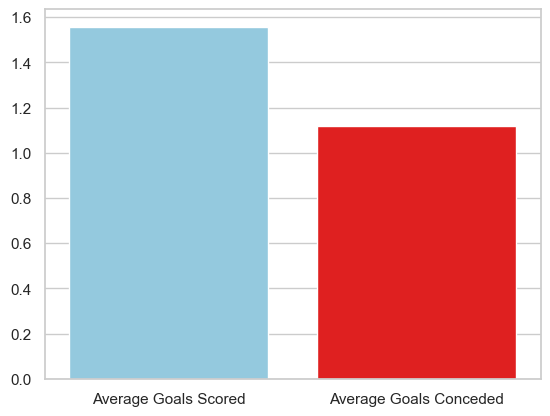

In [42]:
colors = ["green", "red", "skyblue", "red"]
sns.barplot(x=['Average Goals Scored', 'Average Goals Conceded'], y=[avg_goals_scored, avg_goals_conceded], palette=colors[2:4])

/tmp/ipykernel_133/1202225666.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Wins', 'Losses'], y=[spain_wins, spain_losses], palette=colors[2:4])


<Axes: >

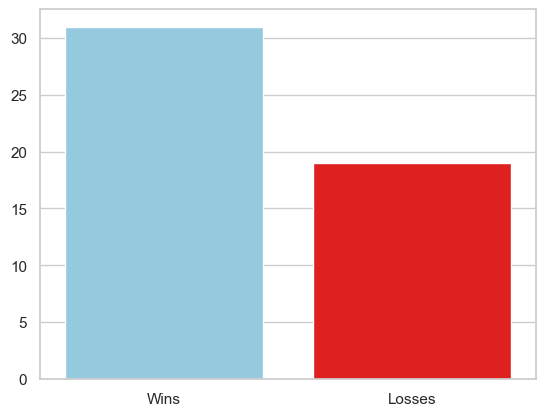

In [43]:
sns.barplot(x=['Wins', 'Losses'], y=[spain_wins, spain_losses], palette=colors[2:4])

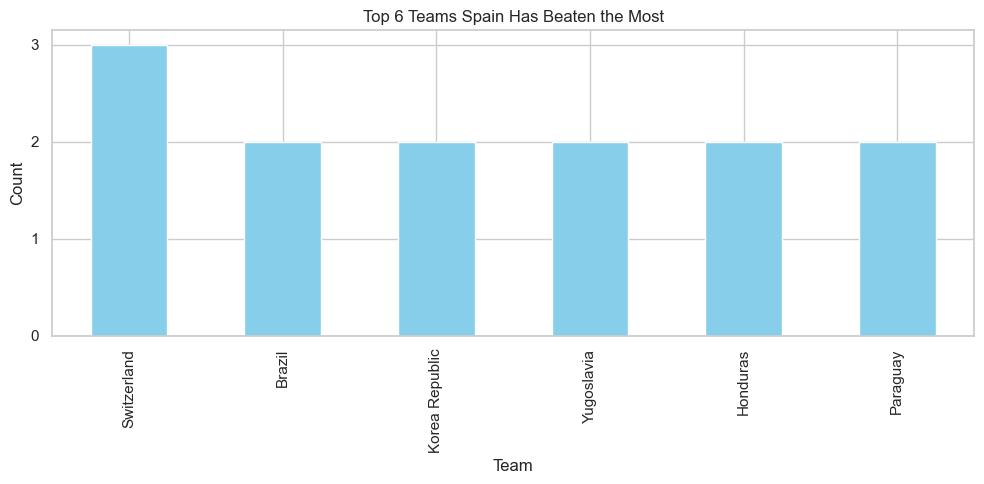

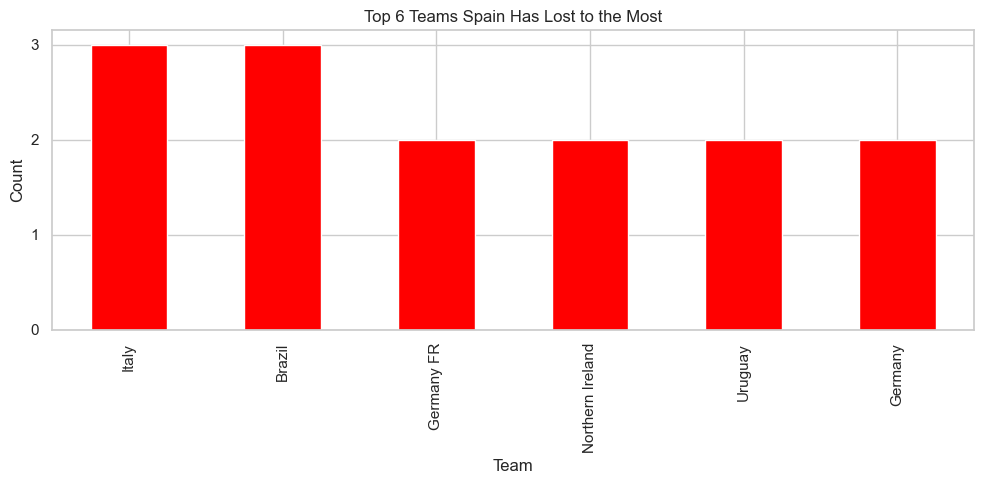

In [70]:
# Count occurrences of teams that Spain has beaten the most and lost to the most
most_wins_counts = spain_matches[spain_matches['home team name'] == 'Spain']['away team name'].value_counts().head(6)
most_losses_counts = spain_matches[spain_matches['away team name'] == 'Spain']['home team name'].value_counts().head(6)

# fig, ax = plt.subplots(2, 1, figsize...)
# Create separate plots for most wins and most losses
fig, ax = plt.subplots(figsize=(10, 5))

# Plot most wins
most_wins_counts.plot(kind='bar', color='skyblue')
ax.set_title('Top 6 Teams Spain Has Beaten the Most')
ax.set_xlabel('Team')
ax.set_ylabel('Count')

plt.yticks(range(int(max(most_wins_counts))+1))

# Show the plot
plt.tight_layout()
plt.show()

# Create another figure for most losses
fig2, ax2 = plt.subplots(figsize=(10, 5))

# Plot most losses
most_losses_counts.plot(kind='bar', color='red')
ax2.set_title('Top 6 Teams Spain Has Lost to the Most')
ax2.set_xlabel('Team')
ax2.set_ylabel('Count')

plt.yticks(range(int(max(most_losses_counts))+1))

# Show the plot
plt.tight_layout()
# plt.savefig("../resources/filename.svg", format="svg")
plt.show()


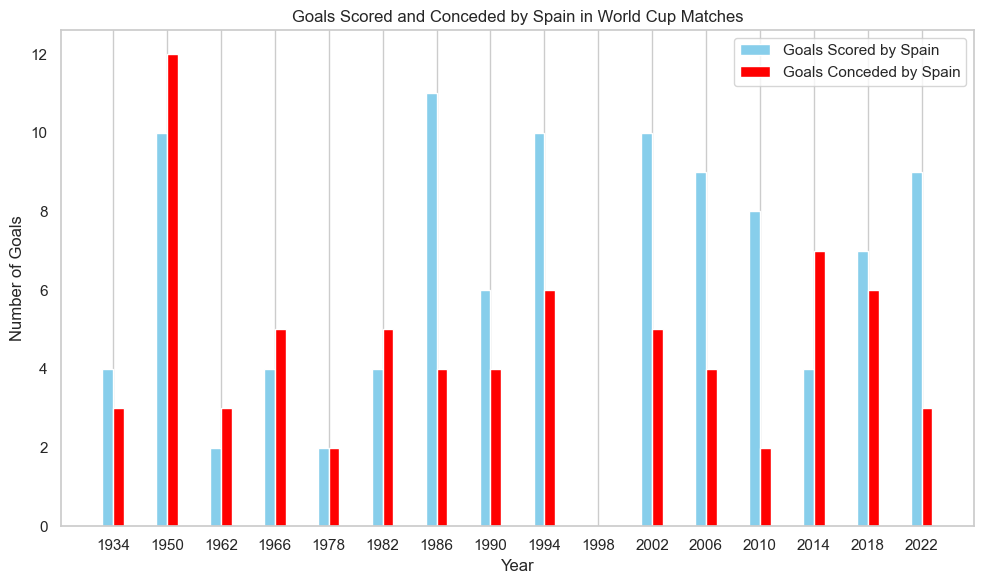

In [71]:
spain_home_matches = spain_copy[spain_copy['home team name'] == 'Spain']
spain_away_matches = spain_copy[spain_copy['away team name'] == 'Spain']

# Group by year and calculate total goals scored and conceded by Spain
goals_scored = spain_home_matches.groupby('year')['home team goals'].sum() + spain_away_matches.groupby('year')['away team goals'].sum()
goals_conceded = spain_home_matches.groupby('year')['away team goals'].sum() + spain_away_matches.groupby('year')['home team goals'].sum()

x = range(len(goals_scored))

# Plot the data
plt.figure(figsize=(10, 6))
bar_width = 0.2

plt.bar(x, goals_scored.values, width=bar_width, label='Goals Scored by Spain', color='skyblue')
plt.bar([i + bar_width for i in x], goals_conceded.values, width=bar_width, label='Goals Conceded by Spain', color='red')

# Set x-axis labels
plt.xticks([i + bar_width / 2 for i in x], goals_scored.index)

plt.xlabel('Year')
plt.ylabel('Number of Goals')
plt.title('Goals Scored and Conceded by Spain in World Cup Matches')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [58]:
temp_df = spain_copy.groupby(["year","spain role"]).agg({"home team goals": 'sum', "away team goals": 'sum'}).reset_index()
temp_df.head()

,year,spain role,home team goals,away team goals
0,1934,away,2,1
1,1934,home,3,1
2,1950,away,11,4
3,1950,home,6,1
4,1962,away,3,1


In [59]:
temp_df_melted = temp_df.melt(id_vars=["year", "spain role"], value_vars=["home team goals", "away team goals"] )

In [60]:
temp_df_melted_2 = temp_df_melted.groupby(["year","spain role","variable"])[["value"]].sum().reset_index().sort_values(["year",
                                                                                                     "spain role", "variable"])

temp_df_melted_2

,year,spain role,variable,value
0,1934,away,away team goals,1
1,1934,away,home team goals,2
2,1934,home,away team goals,1
3,1934,home,home team goals,3
4,1950,away,away team goals,4
...,...,...,...,...
57,2018,home,home team goals,3
58,2022,away,away team goals,1
59,2022,away,home team goals,2
60,2022,home,away team goals,1


In [61]:
temp_df_melted_2.rename(columns={'value': 'goals'}, inplace=True)

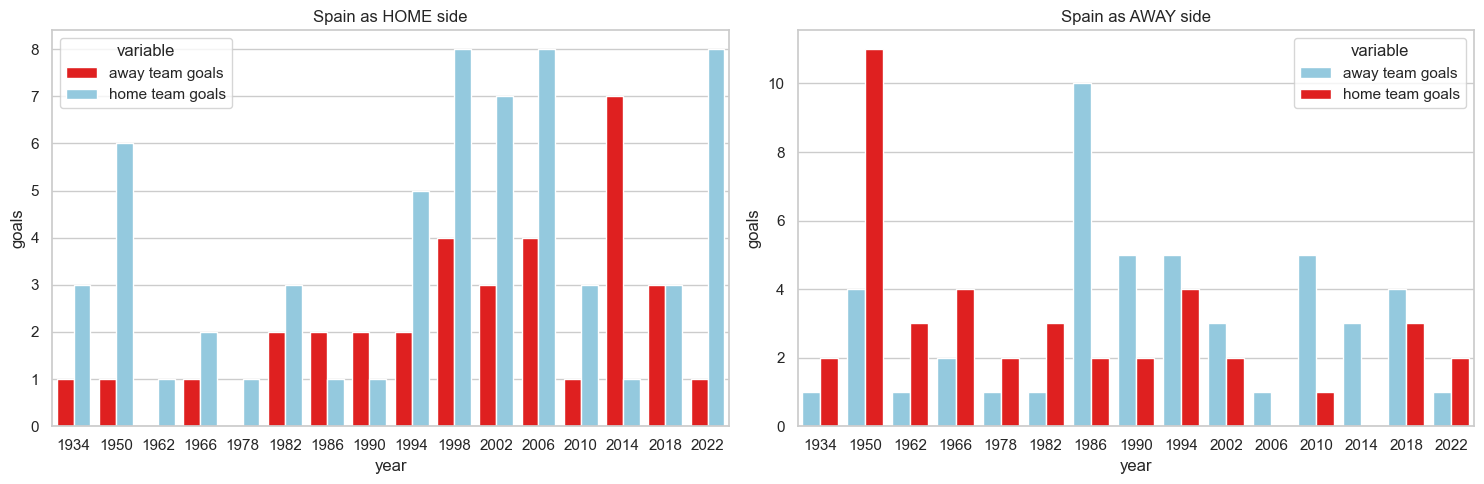

In [62]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

custom_palette = {"home team goals": "skyblue", "away team goals": "red"}
custom_palette2 = {"home team goals": "red", "away team goals": "skyblue"}

sns.barplot(data=temp_df_melted_2[temp_df_melted_2['spain role']=="home"], x="year", y="goals", 
            hue="variable",palette = custom_palette, errorbar=None, ax=ax[0])
sns.barplot(data=temp_df_melted_2[temp_df_melted_2['spain role']=="away"], x="year", y="goals", 
            hue="variable", palette = custom_palette2, errorbar=None, ax=ax[1])
ax[0].set_title("Spain as HOME side")
ax[1].set_title("Spain as AWAY side")
plt.tight_layout()
plt.show()